In [ ]:
## AHRS (Attitude and Heading Reference System) ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ahrs

In [2]:
data = pd.read_csv('IMU_data.csv', sep=',', header=None)
data.columns = ['time', 'ax', 'ay', 'az', 'gx', 'gy', 'gz']
data_magnet = pd.read_csv('magnet_data.csv', sep=',', header=None)
data_magnet.columns = ['time', 'mx', 'my', 'mz', 'declination']

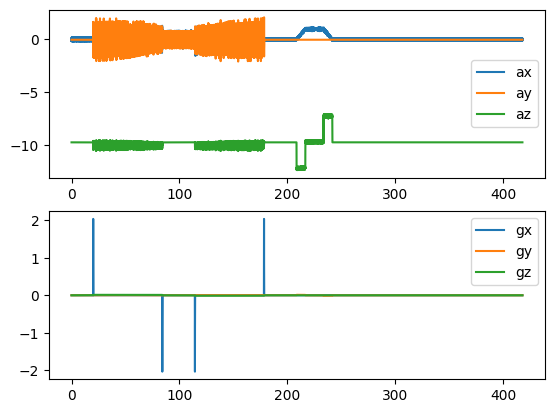

In [3]:
# plot data
plt.figure()
plt.subplot(211)
plt.plot(data['time'], data['ax'], label='ax')
plt.plot(data['time'], data['ay'], label='ay')
plt.plot(data['time'], data['az'], label='az')
plt.legend()
plt.subplot(212)
plt.plot(data['time'], data['gx'], label='gx')
plt.plot(data['time'], data['gy'], label='gy')
plt.plot(data['time'], data['gz'], label='gz')
plt.legend()
plt.show()


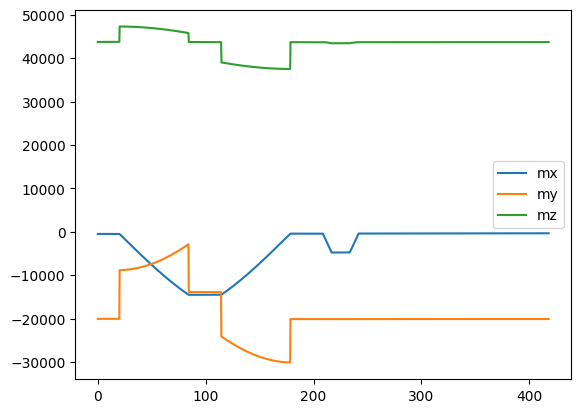

In [4]:
# plot magnet data
plt.figure()
plt.plot(data_magnet['time'], data_magnet['mx'], label='mx')
plt.plot(data_magnet['time'], data_magnet['my'], label='my')
plt.plot(data_magnet['time'], data_magnet['mz'], label='mz')
plt.legend()
plt.show()

In [5]:
from ahrs.filters import EKF
ekf = EKF(gyr=data[['gx', 'gy', 'gz']].values, acc=data[['ax', 'ay', 'az']].values, mag=data_magnet[['mx', 'my', 'mz']].values, frequency=100.0)
ekf.Q.shape

(41800, 4)

In [6]:
# plot euler angles
# quaternion to euler angles
from ahrs.common.orientation import q2euler
euler = np.zeros((len(ekf.Q), 3))
for i, q in enumerate(ekf.Q):
    euler[i] = q2euler(q)


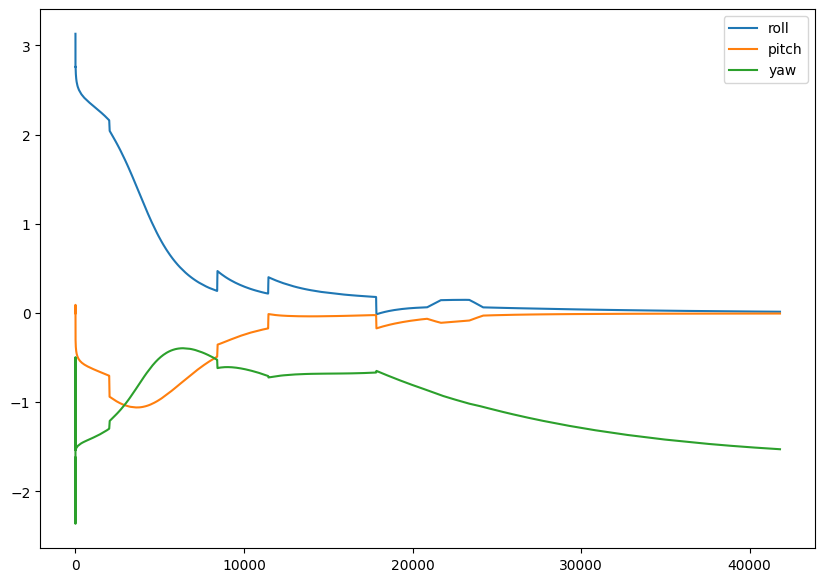

In [7]:
# plot euler angles
plt.figure(figsize=(10, 7))
plt.plot(euler[:, 0], label='roll')
plt.plot(euler[:, 1], label='pitch')
plt.plot(euler[:, 2], label='yaw')
plt.legend()
plt.show()
